## MNIST Handwritten Digit Recognition - Google Colab Notebook
This notebook uses Keras's built-in MNIST dataset for training and testing, ensuring both sets are available. It also includes the optional CSV upload for custom test data.

In [ ]:
# Step 1: Import Libraries
!pip install -q gradio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Step 2: Load MNIST from Keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28), (60000,)
Test set shape: (10000, 28, 28), (10000,)


In [ ]:
# Optional: Load custom CSV test set
from google.colab import files
print("Upload 'mnist_test.csv' if you have a custom test set:")
uploaded = files.upload()
if 'mnist_test.csv' in uploaded:
    df_test = pd.read_csv('mnist_test.csv')
    print("Custom CSV loaded, shape:", df_test.shape)

Upload 'mnist_test.csv' if you have a custom test set:


Saving mnist_test.csv to mnist_test.csv
Custom CSV loaded, shape: (10000, 785)


In [ ]:
# Step 3: Preprocess Data
# Normalize and reshape
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0


Data types of features:
X_train dtype: float64
y_train dtype: uint8
X_test dtype: float64
y_test dtype: uint8

Missing values in training data:
X_train missing: 0
y_train missing: 0
X_test missing: 0
y_test missing: 0

Range of values in features:
X_train min: 0.0 max: 1.0
X_test min: 0.0 max: 1.0

Distribution of target classes in training set:
{np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}

Distribution of target classes in test set:
{np.uint8(0): np.int64(980), np.uint8(1): np.int64(1135), np.uint8(2): np.int64(1032), np.uint8(3): np.int64(1010), np.uint8(4): np.int64(982), np.uint8(5): np.int64(892), np.uint8(6): np.int64(958), np.uint8(7): np.int64(1028), np.uint8(8): np.int64(974), np.uint8(9): np.int64(1009)}


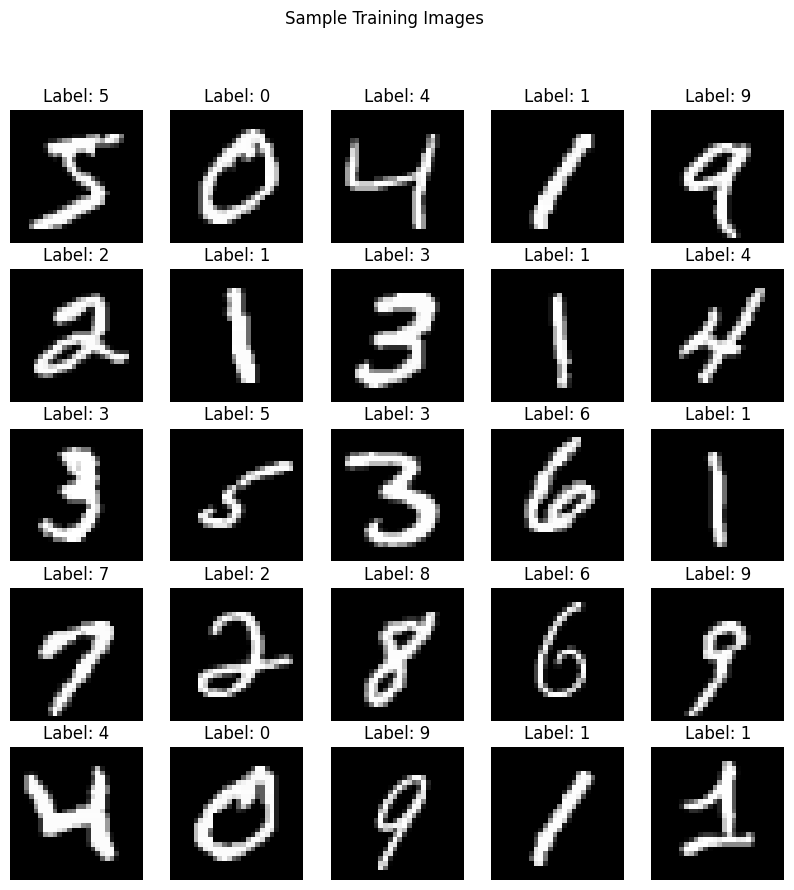


--- Custom CSV Data Exploration ---
Custom CSV columns: Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)
Custom CSV info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB

Missing values in custom CSV:
0

Data types of custom test data:
custom_X_test_raw dtype: int64
custom_y_test_raw dtype: int64

Range of values in raw custom test data:
custom_X_test_raw min: 0 max: 255

Distribution of target classes in custom test set:
{np.int64(0): np.int64(980), np.int64(1): np.int64(1135), np.int64(2): np.int64(1032), np.int64(3): np.int64(1010), np.int64(4): np.int64(982), np.int64(5): np.int64(892), np.int64(6): np.int64(958), np.int64(7): np.int64(1028), np.int64(8): np.int64(974), np.int64(9): np.int64(1009)}


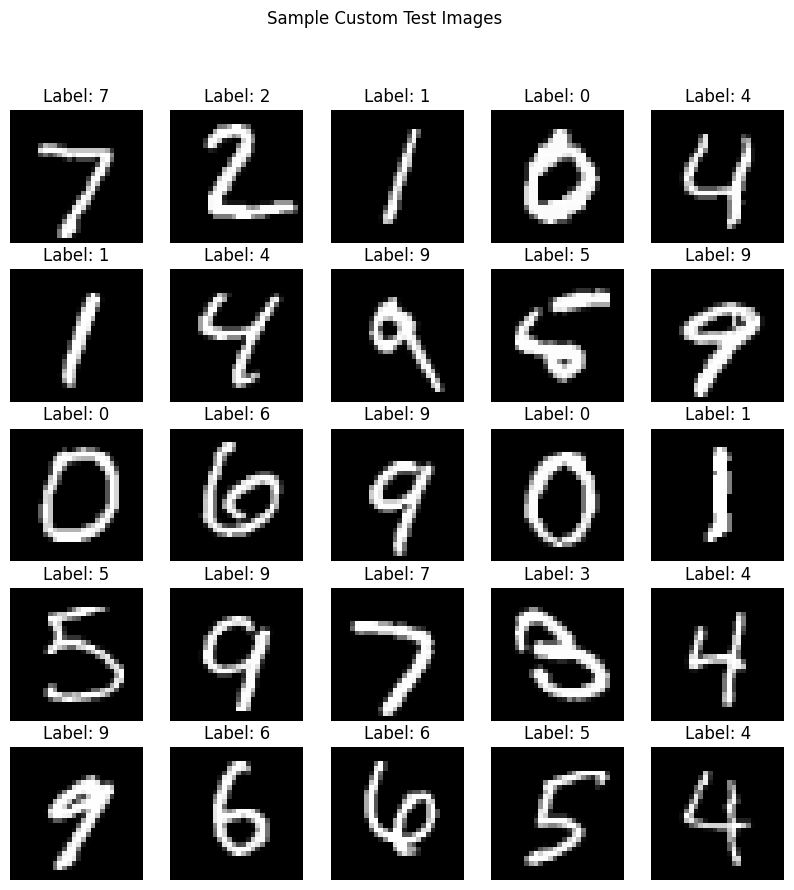

In [ ]:
# Data exploration

import matplotlib.pyplot as plt
import numpy as np
# Check the data types
print("\nData types of features:")
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)
print("X_test dtype:", X_test.dtype)
print("y_test dtype:", y_test.dtype)

# Check for missing values
print("\nMissing values in training data:")
print("X_train missing:", np.isnan(X_train).sum())
print("y_train missing:", np.isnan(y_train).sum())
print("X_test missing:", np.isnan(X_test).sum())
print("y_test missing:", np.isnan(y_test).sum())

# Check the range of values in the features (after normalization)
print("\nRange of values in features:")
print("X_train min:", X_train.min(), "max:", X_train.max())
print("X_test min:", X_test.min(), "max:", X_test.max())

# Check the distribution of target classes
print("\nDistribution of target classes in training set:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(dict(zip(unique_train, counts_train)))

print("\nDistribution of target classes in test set:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(dict(zip(unique_test, counts_test)))

# Display some sample images (optional, requires reshaping back for plotting)
# Reshape back for plotting
X_train_img = X_train.reshape(-1, 28, 28)
X_test_img = X_test.reshape(-1, 28, 28)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_img[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.show()

if 'df_test' in globals():
    # If custom CSV was loaded, perform similar checks
    print("\n--- Custom CSV Data Exploration ---")
    print("Custom CSV columns:", df_test.columns)
    print("Custom CSV info:")
    df_test.info()
    print("\nMissing values in custom CSV:")
    print(df_test.isnull().sum().sum())

    # Assuming the first column is the label and the rest are pixel values
    # (This might need adjustment based on the actual CSV format)
    custom_X_test_raw = df_test.drop(df_test.columns[0], axis=1).values
    custom_y_test_raw = df_test[df_test.columns[0]].values

    # Check data types of custom data
    print("\nData types of custom test data:")
    print("custom_X_test_raw dtype:", custom_X_test_raw.dtype)
    print("custom_y_test_raw dtype:", custom_y_test_raw.dtype)

    # Check the range of values in the raw custom data
    print("\nRange of values in raw custom test data:")
    print("custom_X_test_raw min:", custom_X_test_raw.min(), "max:", custom_X_test_raw.max())

    # Check the distribution of target classes in custom test set
    print("\nDistribution of target classes in custom test set:")
    unique_custom, counts_custom = np.unique(custom_y_test_raw, return_counts=True)
    print(dict(zip(unique_custom, counts_custom)))

    # Display some sample custom images (optional, requires reshaping back for plotting)
    custom_X_test_img = custom_X_test_raw.reshape(-1, 28, 28)

    plt.figure(figsize=(10, 10))
    num_samples_to_plot = min(25, custom_X_test_img.shape[0])
    for i in range(num_samples_to_plot):
        plt.subplot(5, 5, i + 1)
        # Scale the pixel values to 0-255 for display if they are not already
        img_to_show = custom_X_test_img[i]
        if img_to_show.max() <= 1:
            img_to_show = img_to_show * 255
        plt.imshow(img_to_show.astype(np.uint8), cmap='gray')
        plt.title(f"Label: {custom_y_test_raw[i]}")
        plt.axis('off')
    plt.suptitle("Sample Custom Test Images")
    plt.show()

In [ ]:
# prompt: Data analysis

import matplotlib.pyplot as plt
import numpy as np
# If a custom test set was uploaded, use it. Otherwise, use the Keras test set.
# files.upload() # Remove this duplicated call
from google.colab import files # Re-import files

if 'mnist_test.csv' in uploaded:
  # The first column is the label, the rest are pixel values
  y_test_custom = df_test.iloc[:, 0].values
  X_test_custom = df_test.iloc[:, 1:].values / 255.0 # Normalize
  X_test = X_test_custom
  y_test = y_test_custom
  print("Using custom test set.")
else:
  print("Using default Keras test set.")

print(f"Final Test set shape: {X_test.shape}, {y_test.shape}")

Using custom test set.
Final Test set shape: (10000, 784), (10000,)


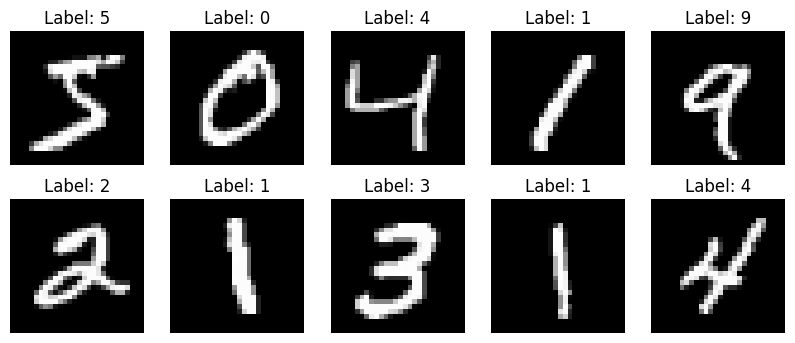

In [ ]:
# Step 4: Visualize Sample Digits
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
# Step 5: Build Model
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Train Model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8686 - loss: 0.4549 - val_accuracy: 0.9650 - val_loss: 0.1139
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9639 - loss: 0.1188 - val_accuracy: 0.9713 - val_loss: 0.0918
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9753 - loss: 0.0770 - val_accuracy: 0.9758 - val_loss: 0.0792
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9831 - loss: 0.0519 - val_accuracy: 0.9767 - val_loss: 0.0802
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9873 - loss: 0.0414 - val_accuracy: 0.9762 - val_loss: 0.0828
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9882 - loss: 0.0348 - val_accuracy: 0.9785 - val_loss: 0.0806
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9905 - loss: 0.0285 - val_accuracy: 0.9782 - val_loss: 0.0856
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9925 - loss: 0.02

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.1045
Test Accuracy: 0.9771
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



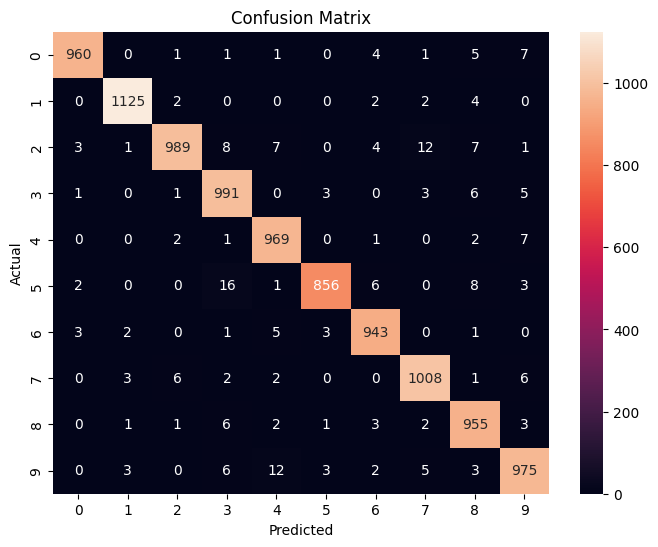

In [ ]:
# Step 7: Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Step 8: Deploy with Gradio
def gradio_interface(img):
    img = np.array(img.convert('L')).reshape(1,784)/255.0
    pred = model.predict(img)
    return {str(i): float(pred[0][i]) for i in range(10)}

interface = gr.Interface(fn=gradio_interface,
                         inputs=gr.Image(height=180, width=180, image_mode='l'), # Changed 'shape' to 'height' and 'width'
                         outputs=gr.Label(num_top_classes=3),
                         live=True)
 #ensure the closing   parenthesis  is correctly indented
interface.launch(pwa=True,share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://edfe73c73ed52a31d6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Save the trained model
model.save("mnist_model.h5")
print("Model saved as mnist_model.h5")

Model saved as mnist_model.h5


In [ ]:
# Download the model file
from google.colab import files
files.download("mnist_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>